**Import Required Libraries**

In [ ]:
!pip install roboflow
!pip install ultralytics==8.0.196

**Load Dataset**

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="lWjBywj3M1I4YI09jTmu")
project = rf.workspace("road-crack-project").project("road-crack-detection-combined-dataset")
version = project.version(2)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-Crack-Detection-Combined-Dataset-2 in yolov5pytorch:: 100%|██████████| 3510/3510 [00:00<00:00, 4263.99it/s]


**Create Yolo V5 Object Detection Model**

In [3]:
from ultralytics import YOLO

In [4]:
# Load a model
model = YOLO('yolov5n.yaml')
model = YOLO('yolov5nu.pt')


                   from  n    params  module                                       arguments                     
  0                  -1  1      1760  ultralytics.nn.modules.conv.Conv             [3, 16, 6, 2, 2]              
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      4800  ultralytics.nn.modules.block.C3              [32, 32, 1]                   
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  3    156928  ultralytics.nn.modules.block.C3              [128, 128, 3]                 
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

**Train the Yolo V5 Model on Road Crack Dataset**

In [6]:
# train the model
results = model.train(data = '/content/Road-Crack-Detection-Combined-Dataset-2/data.yaml', epochs = 50)

New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5nu.pt, data=/content/Road-Crack-Detection-Combined-Dataset-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vi

**Training Results**

In [7]:
import pandas as pd

train_results = pd.read_csv("/content/runs/detect/train2/results.csv")
train_results.tail()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,1.2743,1.01330,1.2276,0.61003,0.53179,0.53676,0.29509,1.7192,1.2924,1.4843,0.000161,0.000161,0.000161
46,47,1.2653,1.00770,1.2207,0.64316,0.60832,0.55962,0.30451,1.7062,1.3316,1.4787,0.000136,0.000136,0.000136
47,48,1.2440,0.96662,1.2090,0.57505,0.62648,0.56316,0.31384,1.7164,1.3165,1.4840,0.000111,0.000111,0.000111
48,49,1.2279,0.95375,1.1953,0.53400,0.62840,0.55518,0.30620,1.7159,1.3384,1.4855,0.000087,0.000087,0.000087
49,50,1.2124,0.96034,1.1839,0.62737,0.51802,0.55283,0.30513,1.7126,1.3137,1.4808,0.000062,0.000062,0.000062


(-0.5, 2399.5, 1199.5, -0.5)

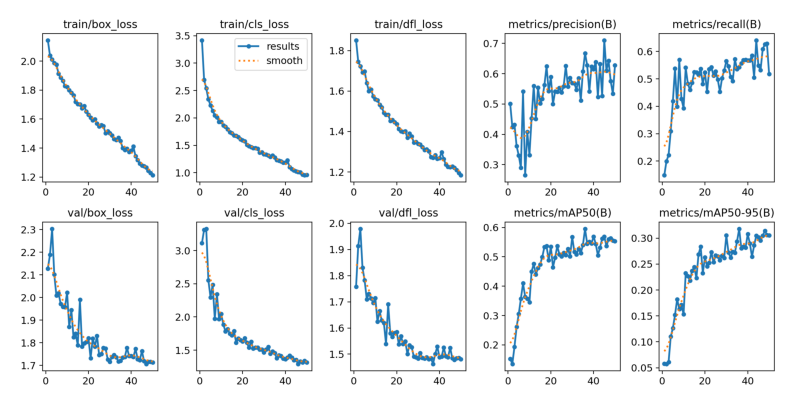

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
train_res = plt.imread("/content/runs/detect/train2/results.png")
plt.imshow(train_res)
plt.axis("off")

**R_curve**

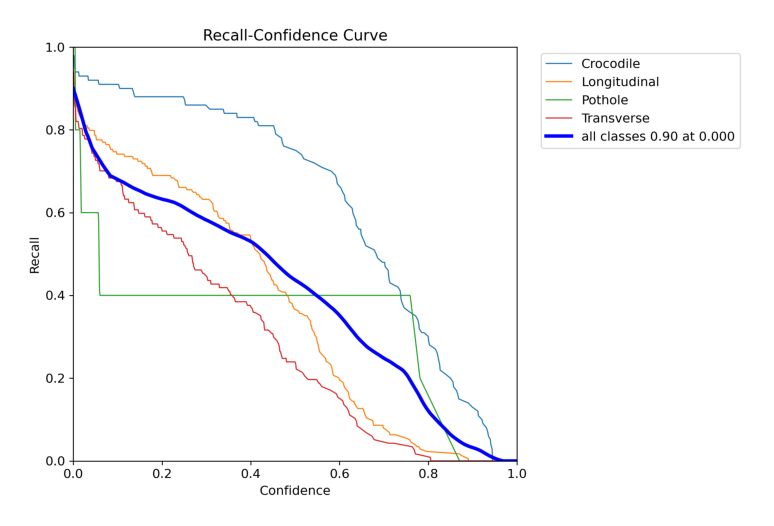

In [15]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/train2/R_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**P-Curve**

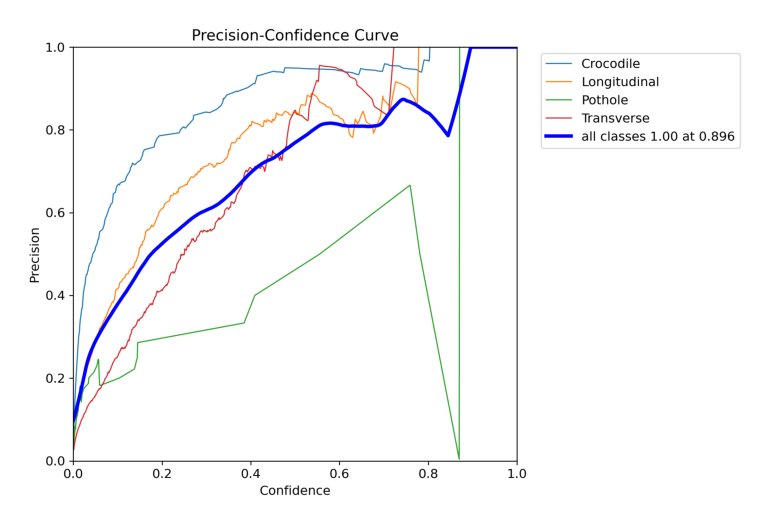

In [16]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/train2/P_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**PR_curve**

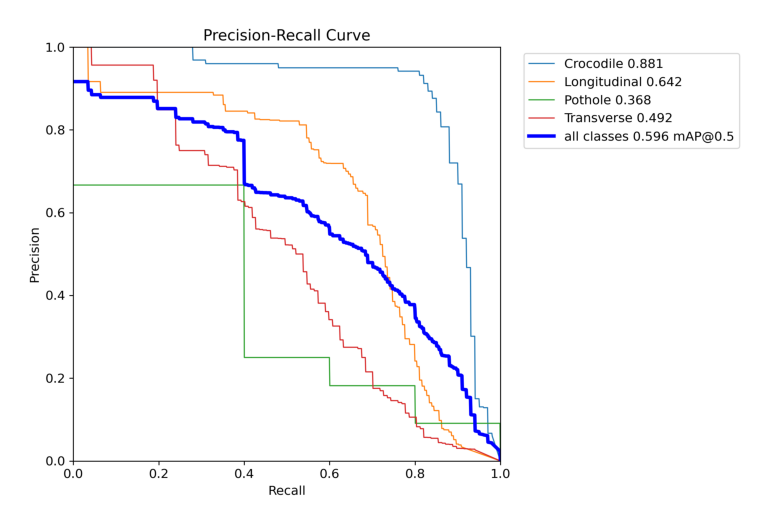

In [17]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/train2/PR_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**F1_curve**

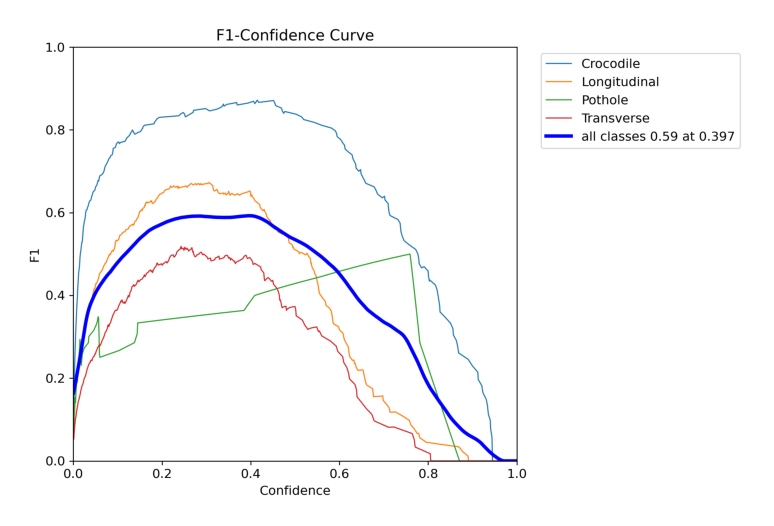

In [18]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/train2/F1_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**Confusion Matrix**

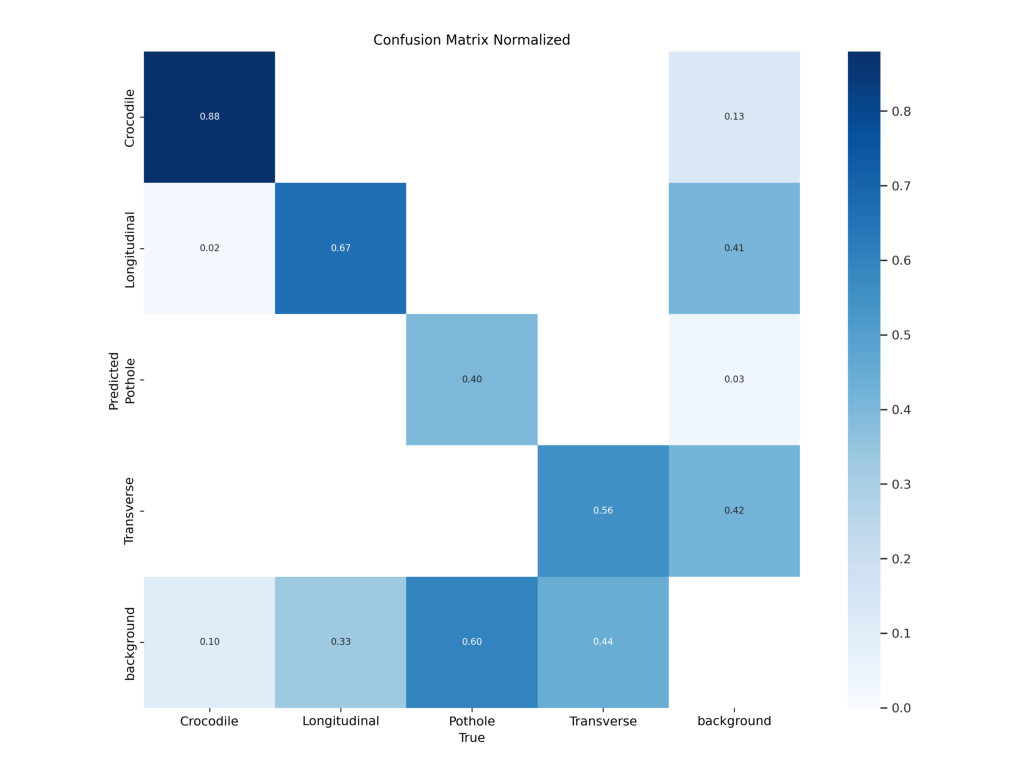

In [20]:
# Load the image
r_curve = plt.imread("/content/runs/detect/train2/confusion_matrix_normalized.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=200)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**Validate results the Yolo V5 on Validation Dataset**

**R_curve**

In [21]:
model.val()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2503724 parameters, 0 gradients, 7.1 GFLOPs
val: Scanning /content/Road-Crack-Detection-Combined-Dataset-2/valid/labels.cache... 190 images, 0 backgrounds, 0 corrupt: 100%|██████████| 190/190 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.86it/s]
                   all        190        396      0.669      0.543      0.595      0.318
             Crocodile        190        100      0.903      0.838      0.879      0.561
          Longitudinal        190        174      0.792      0.548      0.644      0.296
               Pothole        190          5      0.331        0.4      0.367      0.234
            Transverse        190

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb278249510>
fitness: 0.34563619090148945
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.56094,     0.29594,      0.2342,      0.1806])
names: {0: 'Crocodile', 1: 'Longitudinal', 2: 'Pothole', 3: 'Transverse'}
plot: True
results_dict: {'metrics/precision(B)': 0.6692483606519661, 'metrics/recall(B)': 0.5428398686714754, 'metrics/mAP50(B)': 0.595095067356204, 'metrics/mAP50-95(B)': 0.3179185379620767, 'fitness': 0.34563619090148945}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 0.5271346945511668, 'inference': 7.920010466324656, 'loss': 0.0013941212704307155, 'postprocess': 3.9067833047164116}

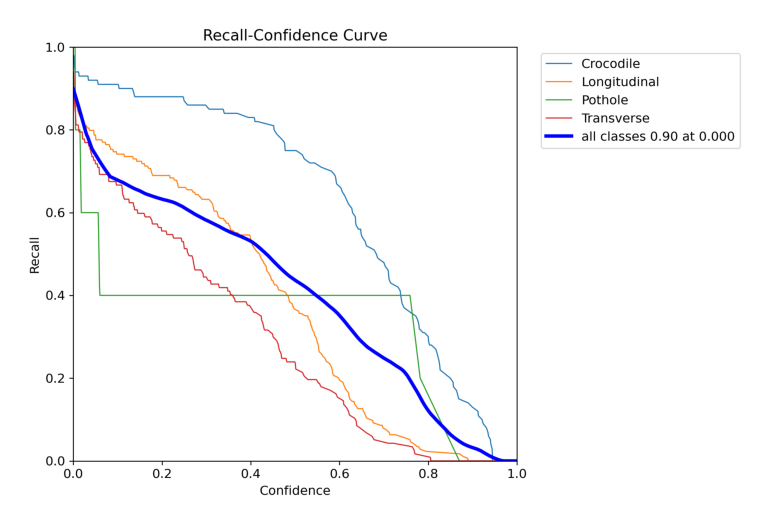

In [27]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/R_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**P-Curve**

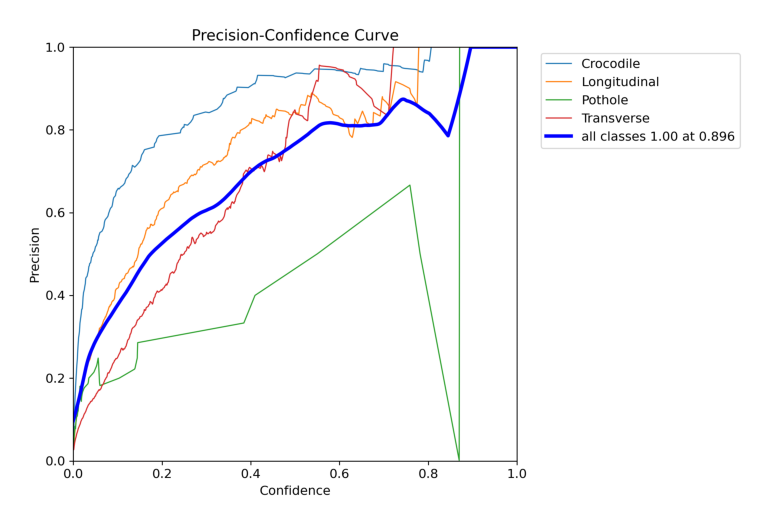

In [25]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/P_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**PR_curve**

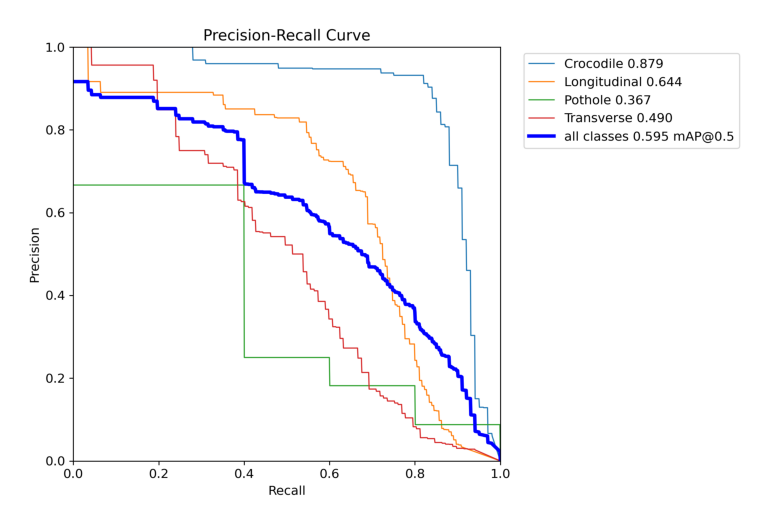

In [26]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/PR_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**F1_curve**

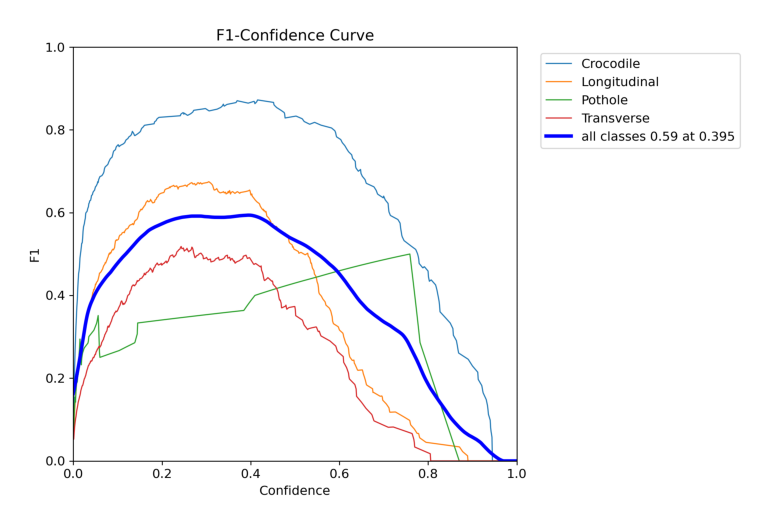

In [28]:
# Load the image
r_curve = plt.imread("/content/runs/detect/val/F1_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**Confusion Matrix**

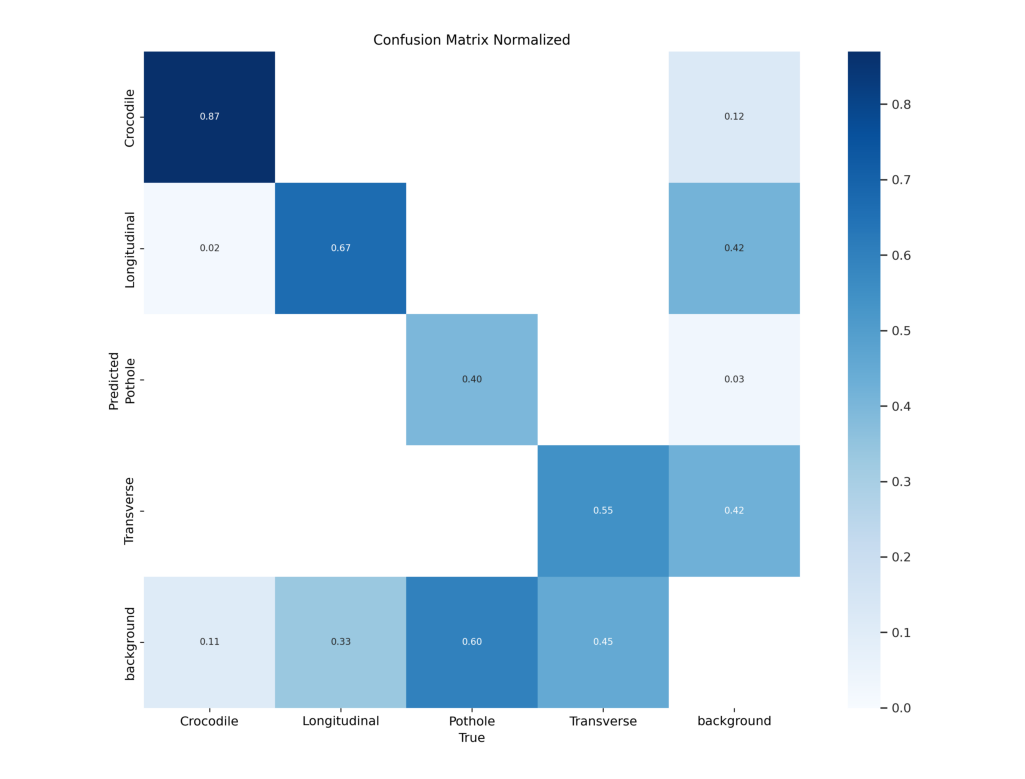

In [30]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/confusion_matrix_normalized.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=200)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**Visual Results**

In [34]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/val_batch1_pred.jpg")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=300)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Test YOLO V5 Model on Test images**

In [35]:
# Run evaluation on the test image set
test_results = model.predict(source="/content/Road-Crack-Detection-Combined-Dataset-2/test/images", save=True)


image 1/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1019---Copy_jpg.rf.97797afc733e95ac2025d1d368f58068.jpg: 384x640 1 Crocodile, 129.1ms
image 2/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1072---Copy_jpg.rf.f6fb519bb6de940f9a56f181b5325462.jpg: 384x640 1 Crocodile, 1 Transverse, 9.6ms
image 3/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1131---Copy_jpg.rf.c3d5b11f5c4f82c71613b7e556c9356d.jpg: 384x640 (no detections), 9.4ms
image 4/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1171---Copy_jpg.rf.3dace60c37612ded87c6deb48a48cd94.jpg: 384x640 (no detections), 9.1ms
image 5/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1209---Copy_jpg.rf.a905478d978f14ef1926272933a7fde6.jpg: 384x640 (no detections), 8.7ms
image 6/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1231---Copy_jpg.rf.cf0eb4f16f676994ea2cf77f49539d63.jpg: 384x640 (no detections), 8

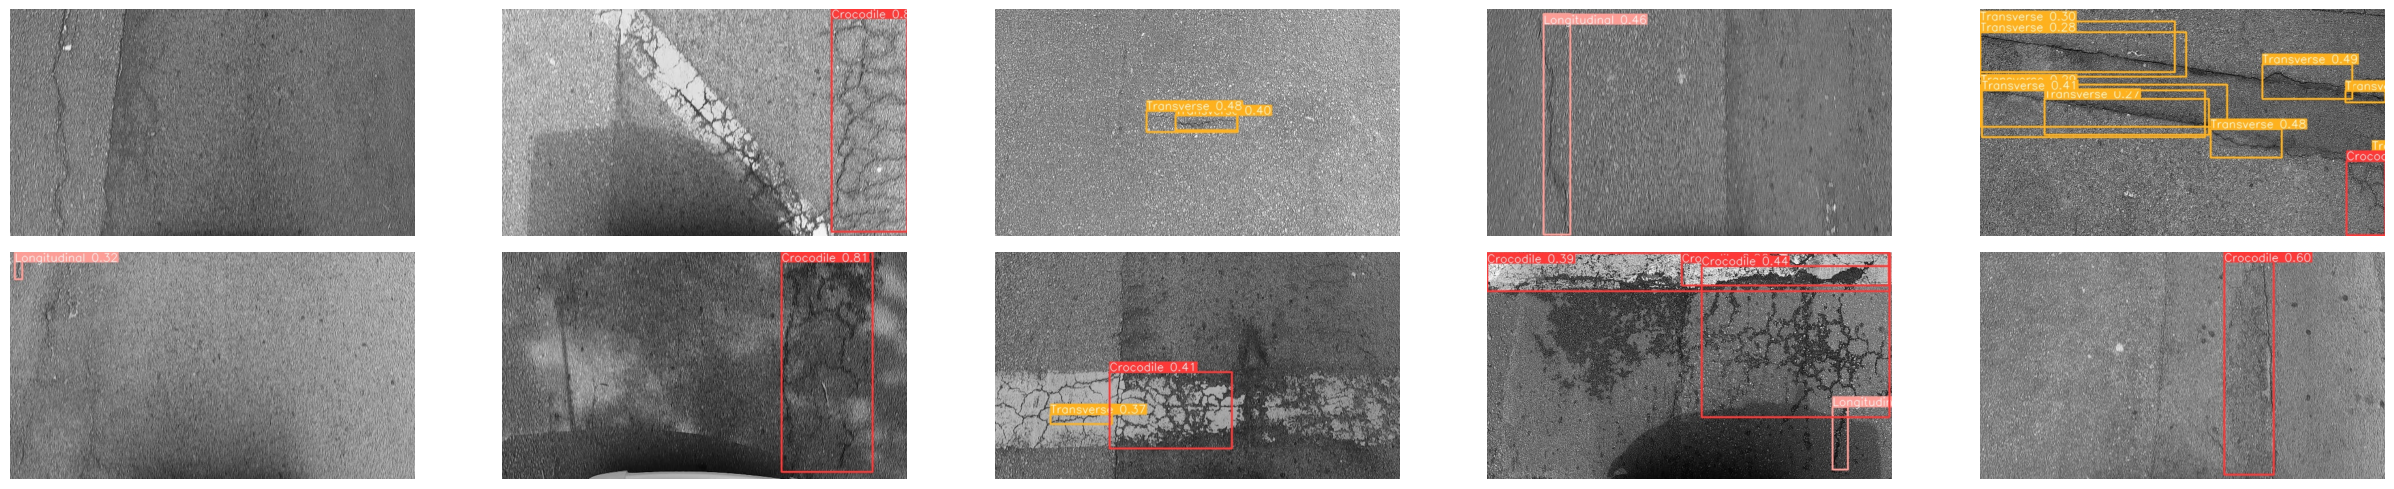

In [39]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Directory containing images
image_dir = '/content/runs/detect/predict'

# Get a list of all files in the directory
all_files = os.listdir(image_dir)

# Filter out non-image files (optional, based on common image extensions)
image_files = [file for file in all_files if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp', 'tiff'))]

# Randomly select 10 images
random_images = random.sample(image_files, 10)

# Create a figure
fig, axes = plt.subplots(2, 5, figsize=(25, 5))

# Flatten axes for easy iteration
axes = axes.flatten()

for ax, img_file in zip(axes, random_images):
    # Load image
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)

    # Display image
    ax.imshow(img)
    #ax.set_title(img_file)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()
